# **1. Persiapan**

## **Import library yang dibutuhkan**

* Mengimpor pandas, pustaka Python yang digunakan untuk manipulasi dan analisis data dalam bentuk tabel (DataFrame dan Series).
* Mengimpor NumPy, pustaka untuk perhitungan numerik dan array multidimensi.
* Mengimpor Seaborn, pustaka visualisasi data yang dibangun di atas matplotlib.
* Mengimpor modul pyplot dari Matplotlib, pustaka utama untuk membuat grafik dan visualisasi di Python.



In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Sambungkan ke google drive**

In [37]:
from google.colab import drive
drive.mount('/content/drive')

path_data = "/content/drive/MyDrive/Capstone Bengkel Coding/Dataset/ObesityDataSet.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Baca dataset**

Head digunakan untuk menampilkan kepala dataset, nilai defaultnya 5 record data, namun bisa kita tetapkan berapa banyak data yang akan ditampilkan.

In [38]:
df = pd.read_csv(path_data)
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


Tail digunakan untuk menampilkan ekor dari data, maksud dari ekor adalah record terakhir dari data.

In [39]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


**Cek info dataset untuk mengetahui data**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Info dari dataset menunjukkan bahwa terdapat sebanyak 2111 record data dapam dataset ini. Namun, dari hasil pengecekan terdapat data yang hilang, hal ini ditandai dengan jumlah record data yang tidak sama antar satu kolom dengan kolom yang lainnya.

# **2. Visualisasi Data**

**Distribusi untuk fitur numerik (kontinu + integer)**

Pada bagian ini kami menampilkan sebaran data pada kolom yang bertipe numerik.

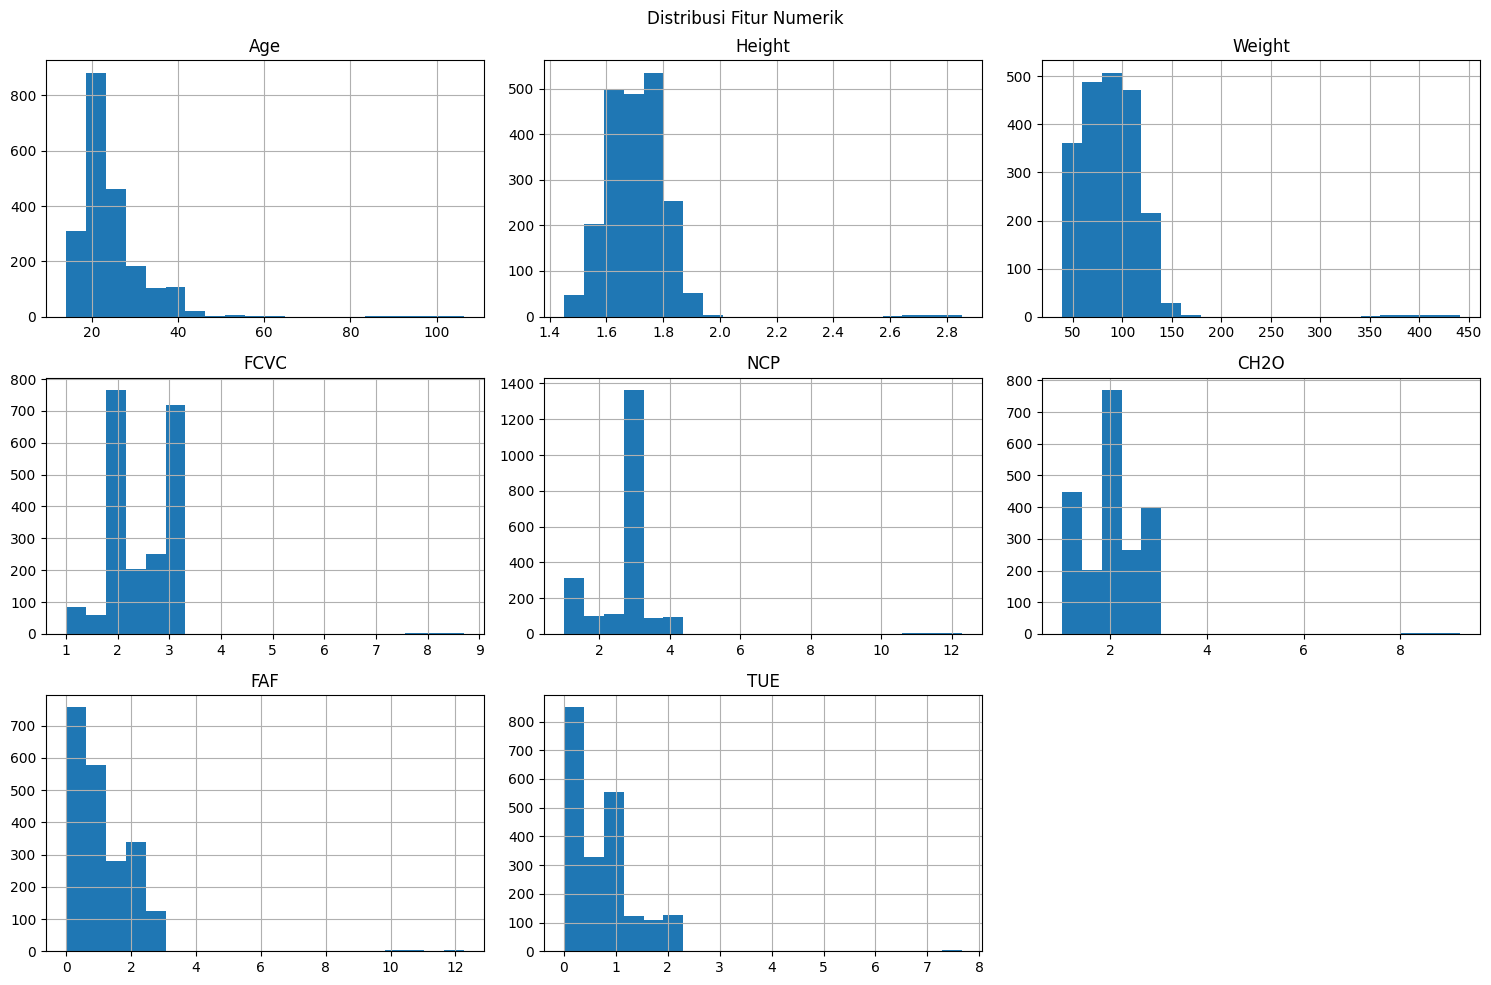

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah kolom-kolom numerik menjadi tipe float/int (jika masih object)
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot histogram
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()


In [42]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


Dari deskripsi data di atas ada kemungkinan data memiliki outlayer, dapat dilihat pada kolom age, height, weight, dst. Nilai-nilai yang ada tidak masuk akal sehingga perlu dilakukan penormalan.

**Distribusi kelas target**

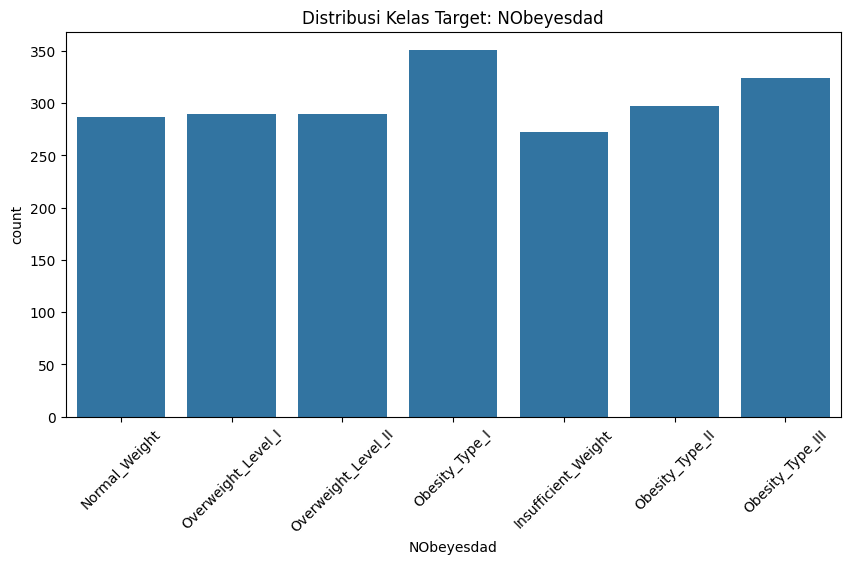

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="NObeyesdad")
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Target: NObeyesdad")
plt.show()

Distribusi class target cukup merata di kisaran >250 dan <350, tidak terdapat perbedaan yang cukup signifikan, namun nantinya tetap perlu dilakukan preprocessing agar data menjadi berkualitas baik.

# **3. Analisis Missing Values, Nilai Unik, Duplikat, Keseimbangan Data, dan Outlier**

**Cek Missing Values**

In [48]:
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


Hasil di atas menunjukkan bahwa beberapa kolom masing mengandung missing value, ini perlu dibersihkan agar dataset menjadi normal nantinya.

**Cek Nilai Unik**

In [49]:
print("\nJumlah nilai unik per kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")


Jumlah nilai unik per kolom:
Age: 1393 nilai unik
Gender: 3 nilai unik
Height: 1561 nilai unik
Weight: 1517 nilai unik
CALC: 5 nilai unik
FAVC: 3 nilai unik
FCVC: 807 nilai unik
NCP: 636 nilai unik
SCC: 3 nilai unik
SMOKE: 3 nilai unik
CH2O: 1262 nilai unik
family_history_with_overweight: 3 nilai unik
FAF: 1185 nilai unik
TUE: 1129 nilai unik
CAEC: 5 nilai unik
MTRANS: 6 nilai unik
NObeyesdad: 7 nilai unik


Nilai unik menandakan ada berapa banyak nilai unik yang ada pada kolom-kolom yang ada, ini perlu dianalisis karena terkadang ada nilai yang tidak dikenali atau bahkan mengarang seperti tanda tanya (?).

**Cek Data Duplikat**

In [50]:
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
18


Data duplikat menunjukkan berapa banyak record yang memiliki value sama, hasil menunjukkan terdapat sebanyak 18 record data yang terdeteksi sebagai data duplikat.

**Cek Keseimbangan Kelas Target**

In [51]:
print("\nDistribusi label:")
print(df["NObeyesdad"].value_counts(normalize=True))


Distribusi label:
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


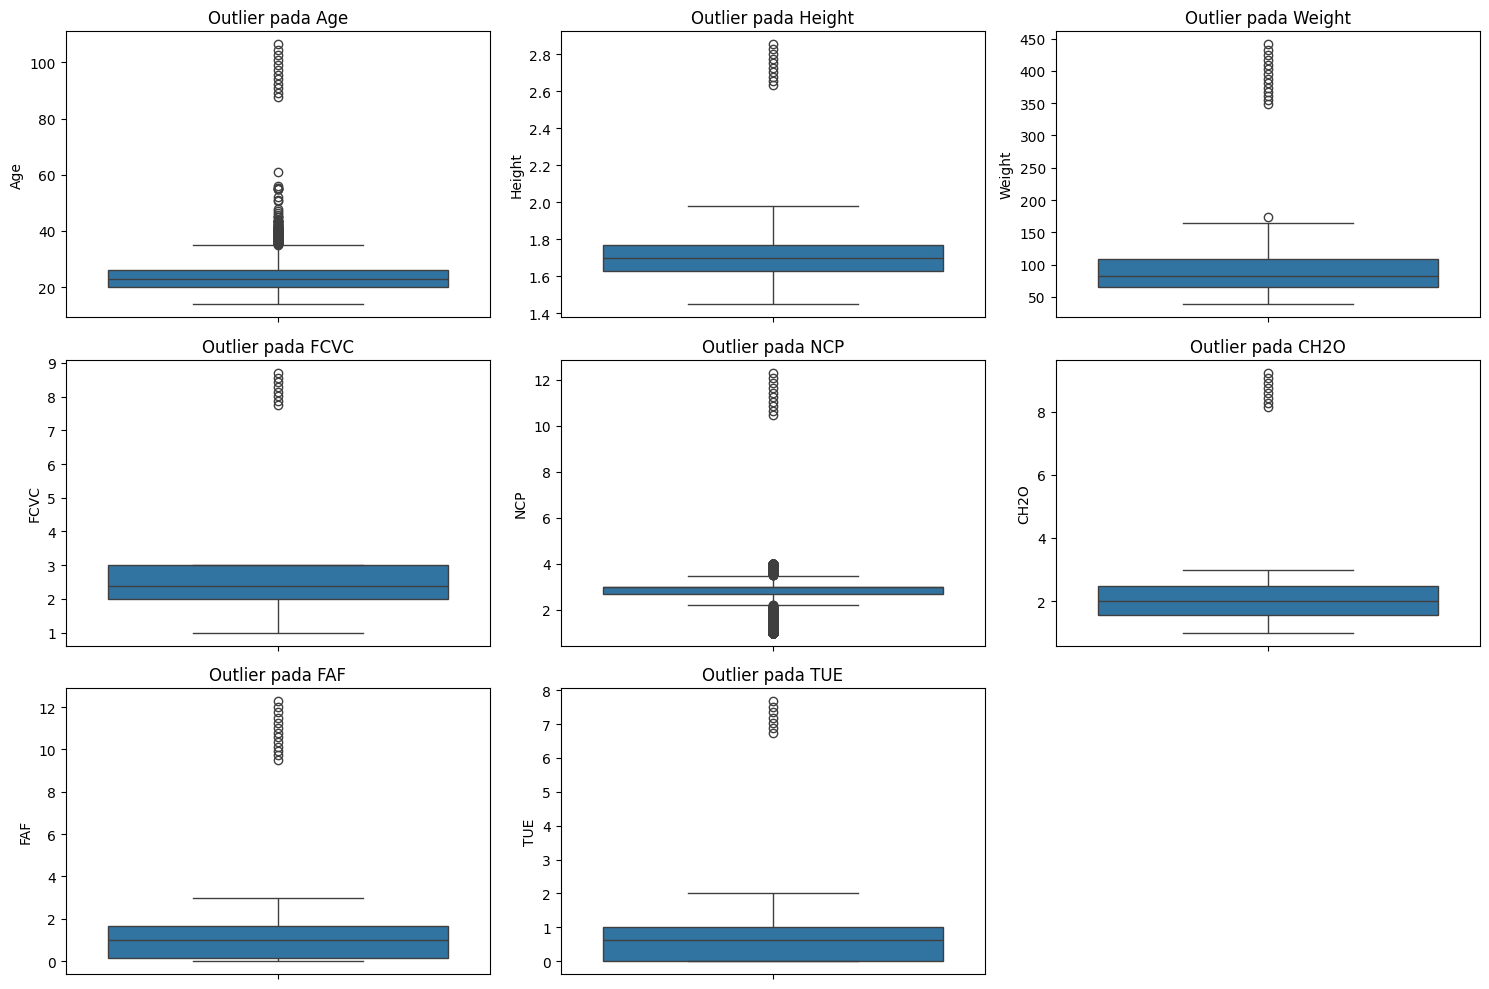

In [52]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()

Dari visualisasi di atas, dapat kita lihat bahwa dalam tiap-tiap kolom ternyata terdapat data outlier. Bisa kita lihat tanda bundar-bundar itu menunjukkan bahwa data ada yang tidak sesuai dengan kebanyakan, boleh jadi nilainya terlalu besar sehingga perlu dinormalisasi nanti dalam proses preprocessing.